# <center> Mercedes-Benz Greener Manufacturing </center>

DESCRIPTION

Reduce the time a Mercedes-Benz spends on the test bench.

Problem Statement Scenario:
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

Following actions should be performed:

<ol>
<li> If for any column(s), the variance is equal to zero, then you need to remove those variable(s). </li>
<li> Check for null and unique values for test and train sets. </li> 
<li>    Apply label encoder. </li> 
<li>    Perform dimensionality reduction. </li> 
<li>    Predict your test_df values using XGBoost. </li> 
</ol>


In [1]:
# All library needed here

# Basic Data Science libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikitlearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


### Acquire

In [2]:
dataset_train = pd.read_csv("train.csv")
dataset_test = pd.read_csv("test.csv")

In [3]:
print(dataset_train.shape)
dataset_train.head()

(4209, 378)


,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print(dataset_test.shape)
dataset_test.head()

(4209, 377)


,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


### Wrangle

Let's check if ID column is just a "primary key" or has other meaning

In [5]:
print('Are ID columns on dataset_train and dataset_test are unique?')
print(  len( dataset_train['ID'].unique() ) == len( dataset_train['ID'] )  )
print(  len( dataset_test['ID'].unique() ) == len( dataset_test['ID'] )  )

print()
print('Are ID columns overlapping? Intersection is empty', set( dataset_train['ID'] ).intersection( set( dataset_test['ID'] ) ) )

Are ID columns on dataset_train and dataset_test are unique?
True
True

Are ID columns overlapping? Intersection is empty set()


Select Features and Target from dataset_train and dataset_test

In [6]:
X_train = dataset_train.drop(columns=['ID','y'])
y_train = dataset_train[['y']]

X_test = dataset_test.drop(columns = ['ID'])

8 variables are not numerical:

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 376 entries, X0 to X385
dtypes: int64(368), object(8)
memory usage: 12.1+ MB


**X11** seems to have just 0 values. Probably the case for other columns.

In [8]:
X_train.describe()

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,0.007840,0.099549,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,0.088208,0.299433,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 1) Remove variable with zeros variance

The statement is ambigus here so I will choose the safest way and remove columns with null variance on the full data set meaning on the concatenation of data_train and data_test

Let's concatenate data_train and data_test:

In [9]:
X_fulldata = pd.concat([X_train, X_test], ignore_index=True)
X_fulldata.shape

(8418, 376)

In [10]:
# Select just numerical values
X_fulldata_num = X_fulldata.select_dtypes(exclude = 'object')
X_train_num = X_train.select_dtypes(exclude = 'object')
X_test_num = X_test.select_dtypes(exclude = 'object')

print(X_fulldata_num.shape, X_train_num.shape, X_test_num.shape)

(8418, 368) (4209, 368) (4209, 368)


In [11]:
std_zero1 = X_fulldata_num.describe().iloc[2] == 0
print( X_fulldata_num.columns[std_zero1] )

std_zero2 = X_train_num.describe().iloc[2] == 0
print( X_train_num.columns[std_zero2] )

std_zero3 = X_test_num.describe().iloc[2] == 0
print( X_test_num.columns[std_zero3] )
print()
print( 'Common columns with null variance in both dataset: none ', set(X_train_num.columns[std_zero2]).intersection( set(X_test_num.columns[std_zero3]) ) )

Index([], dtype='object')
Index(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293',
       'X297', 'X330', 'X347'],
      dtype='object')
Index(['X257', 'X258', 'X295', 'X296', 'X369'], dtype='object')

Common columns with null variance in both dataset: none  set()


Surprisingly there aren't columns with null variance in both datasets so for simplicity I will assume we will remove the ones in Dataset_train only but if possible it would be nice to have a discussion with the suitable Enginering departement because we cannot create an automatic pipeline if we get train and test dataset with different null variance columns (better to manipulate the full data)

In [12]:
std_zero2 = X_train_num.describe().iloc[2] != 0
# X_train numerical with no variance null (nv0)
X_train_num_nv0 = X_train_num[X_train_num.columns[std_zero2] ]
X_train_num_nv0.shape

# BE CAREFUL, I remove columns with zero variance in X_train
X_test_num_nv0 = X_test_num[X_train_num.columns[std_zero2] ]


## 2) Check for null and unique values for test and train sets

### Numerical values

In [13]:
print( X_train_num_nv0.isnull().any().any() )
print( X_test_num_nv0.isnull().any().any() )

False
False


No missing values for numerical columns

In [14]:
X_train_num_nv0.apply( lambda col: col.unique() )

,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,1,0,1,1,1,1,0,1,1,...,1,1,0,1,1,1,1,1,1,1


Just two values: 0 and 1

In [15]:
# Same for X_test_num_nv0
# It is a serie because I remove zero variance column from X_train_num so there some columns with just 0 value as we see before
a = X_test_num_nv0.apply( lambda col: col.unique() )
b = a.apply( lambda size: len(size) )
print('Columns with just 0 value:')
a[b<2]

Columns with just 0 value:


X257    [0]
X258    [0]
X295    [0]
X296    [0]
X369    [0]
dtype: object

### Categorical values

In [16]:
X_train_cat = X_train.select_dtypes(include = 'object')
a = X_train_cat.apply(lambda col: col.unique())
for i, j in enumerate(a):
    print('col', i, ': ', j)
    
X_test_cat = X_test.select_dtypes(include = 'object')
a = X_test_cat.apply(lambda col: col.unique())
for i, j in enumerate(a):
    print('col', i, ': ', j)    

col 0 :  ['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab']
col 1 :  ['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']
col 2 :  ['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar']
col 3 :  ['a' 'e' 'c' 'f' 'd' 'b' 'g']
col 4 :  ['d' 'b' 'c' 'a']
col 5 :  ['u' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac' 'ad' 'ae'
 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa']
col 6 :  ['j' 'l' 'd' 'h' 'i' 'a' 'g' 'c' 'k' 'e' 'f' 'b']
col 7 :  ['o' 'x' 'e' 'n' 's' 'a' 'h' 'p' 'm' 'k' 'd' 'i' 'v' 'j' 'b' 'q' 'w' 'g'
 'y' 'l' 'f' 'u' 'r' 't' 'c']
col 0 :  ['az' 't' 'w' 'y' 'x' 'f' 'ap' 'o' 'ay' 'al' 'h' 'z' 'aj' 'd' '

No suspicion of NaN values

## 3) Apply label encoder.

Probably the number of values push to consider LabelEncoder rather than an OneHotEncoder however the order of LabelEncoder could induce some wrong correlations between observations by ordering these values (OneHotEncoder could be tested for further investigation).

In [17]:
# Train set
le = LabelEncoder()
X_train_cat_trans = X_train_cat.apply(le.fit_transform)
print( X_train_cat_trans )
# OneHotEncoder().fit_transform(X_train_cat)

# Test set
X_test_cat_trans = X_test_cat.apply(le.fit_transform)

      X0  X1  X2  X3  X4  X5  X6  X8
0     32  23  17   0   3  24   9  14
1     32  21  19   4   3  28  11  14
2     20  24  34   2   3  27   9  23
3     20  21  34   5   3  27  11   4
4     20  23  34   5   3  12   3  13
...   ..  ..  ..  ..  ..  ..  ..  ..
4204   8  20  16   2   3   0   3  16
4205  31  16  40   3   3   0   7   7
4206   8  23  38   0   3   0   6   4
4207   9  19  25   5   3   0  11  20
4208  46  19   3   2   3   0   6  22

[4209 rows x 8 columns]


In [18]:
X_train_clean = pd.merge(X_train_num_nv0, X_train_cat_trans, left_index=True, right_index=True)
X_test_clean = pd.merge(X_test_num_nv0, X_test_cat_trans, left_index=True, right_index=True)
print(X_train_clean.shape, X_test_clean.shape)
X_train_clean

(4209, 364) (4209, 364)


,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,X384,X385,X0,X1,X2,X3,X4,X5,X6,X8
0,0,0,1,0,0,0,0,1,0,0,...,0,0,32,23,17,0,3,24,9,14
1,0,0,0,0,0,0,0,1,0,0,...,0,0,32,21,19,4,3,28,11,14
2,0,0,0,0,0,0,1,0,0,0,...,0,0,20,24,34,2,3,27,9,23
3,0,0,0,0,0,0,0,0,0,0,...,0,0,20,21,34,5,3,27,11,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,20,23,34,5,3,12,3,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,0,0,1,0,0,0,0,0,0,...,0,0,8,20,16,2,3,0,3,16
4205,0,0,0,0,0,0,0,0,0,0,...,0,0,31,16,40,3,3,0,7,7
4206,0,1,1,0,0,0,0,0,0,0,...,0,0,8,23,38,0,3,0,6,4
4207,0,0,0,1,0,0,0,0,0,0,...,0,0,9,19,25,5,3,0,11,20


### Explore

Let's see the distribution of the target:

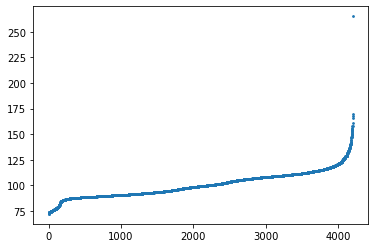

In [19]:
plt.scatter(range(X_train_clean.shape[0]),y_train.sort_values(by = ['y']).values, s = 3)

The last point is obviously an outlier, let's remove it:

In [20]:
outlier = y_train[y_train['y'] > 200].index[0]
print('index to remove: ', outlier)
y_train = y_train.drop(outlier, axis = 'index')
X_train_clean = X_train_clean.drop(outlier, axis = 'index')
print('New shape: ', X_train_clean.shape, y_train.shape)

index to remove:  883
New shape:  (4208, 364) (4208, 1)


Let's display the frequency of y_train:

Text(0.5, 1.0, 'y distribution')

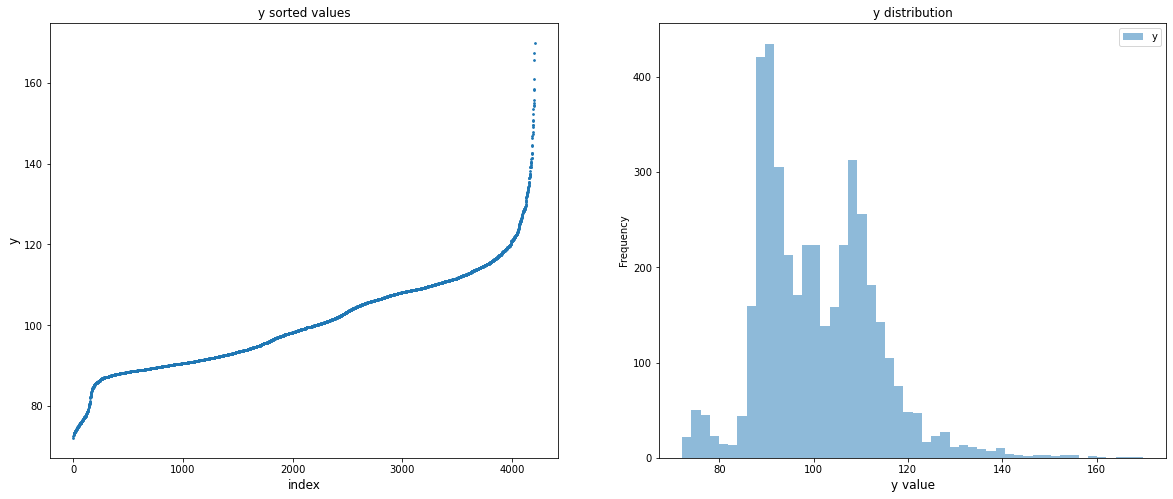

In [21]:
fig, axes = plt.subplots(1,2,figsize=(20,8))

# Figure 1
axes[0].scatter(range(X_train_clean.shape[0]),y_train.sort_values(by = ['y']).values, s = 3)
axes[0].set_xlabel('index', fontsize=12)
axes[0].set_ylabel('y', fontsize=12)
axes[0].set_title('y sorted values')

# Figure 2
y_train.plot.hist(bins=50, alpha=0.5, ax = axes[1])
axes[1].set_xlabel('y value', fontsize=12)
axes[1].set_title('y distribution')

The last point is likely to be an outlier.

The distribution is not Gaussian so the features are likely not independant variables.

## 4) Perform dimensionality reduction

Number of variable is too big to display all correlations, however we can display few of them and see some strong correlations:

<AxesSubplot:>

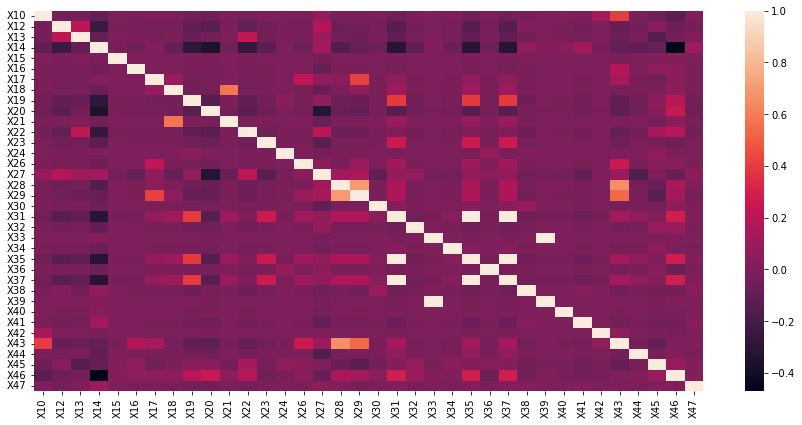

In [22]:
fig = plt.figure(figsize=(15,7))
sns.heatmap(X_train_clean.iloc[:,0:int(X_train_clean.shape[1]/10)].corr())

Let display the sum of correlated variable above 0.9

In [23]:
df1 = abs( X_train_clean.corr() )> 0.9
df2 = pd.DataFrame({col: pd.value_counts(df1[col]) for col in df1}).fillna(0)
# ( Nr of True - the diagonal ) divided per 2 because symetrix matrix
( df2.iloc[1,:].sum() - X_train_clean.shape[1] )/2

221.0

The number of highly correlated variables is high, the PCA dimensionality reduction should have a good benefit:

In [24]:
model_PCA = PCA(n_components = 0.98, svd_solver="full")
model_PCA.fit(X_train_clean)
X_train_clean_pca = model_PCA.transform(X_train_clean)
print(X_train_clean.shape, '\n', X_train_clean_pca.shape, sep = '')

X_test_clean_pca = model_PCA.transform(X_test_clean)
print(X_test_clean.shape, '\n', X_test_clean_pca.shape, sep = '')

(4208, 364)
(4208, 14)
(4209, 364)
(4209, 14)


With 14 variables we can explain 98% of the model and furthermore the computation is quite short. We can also confirm it via feature importances of a random forest:

C:\Users\b_pi\AppData\Local\Temp/ipykernel_27976/2780572238.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_clean, y_train)


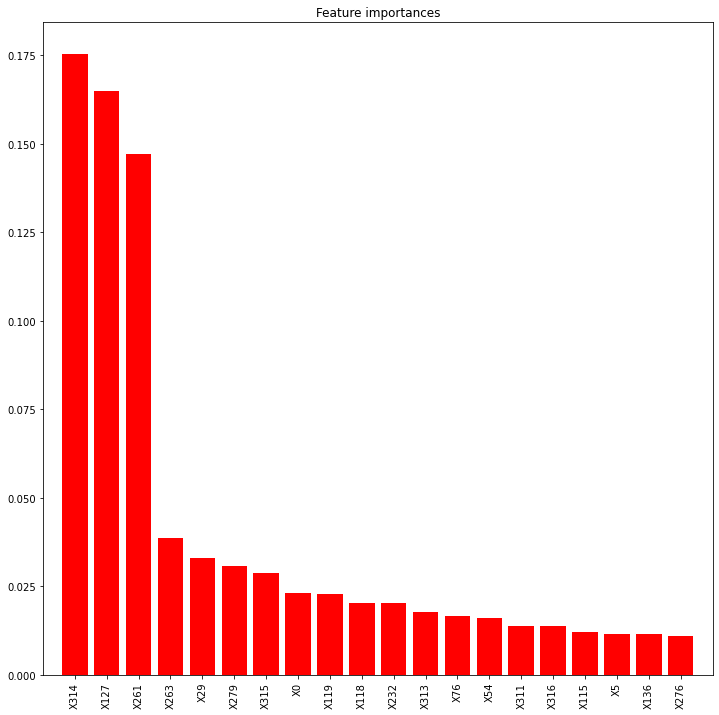

In [25]:
model = ensemble.RandomForestRegressor(n_estimators=200, 
                                       max_depth=10, min_samples_leaf=4, 
                                       max_features=0.2, n_jobs=-1, 
                                       random_state=0)
model.fit(X_train_clean, y_train)
feat_names = X_train_clean.columns.values

## plot the importances ##
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:20]

plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="r", align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

## XGBoost model

### Simple XGBRegressor (meaning default parameters)

In [26]:
X_train2, X_valid2, y_train2, y_valid2 = train_test_split(X_train_clean_pca,y_train, test_size = 0.2, random_state = 43)

In [27]:
xgb_model1 = XGBRegressor(objective="reg:squarederror", random_state = 43)
xgb_model1.fit(X_train2, y_train2)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=43,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [28]:
y_pred = xgb_model1.predict(X_valid2)

In [29]:
mean_abs_err = mean_absolute_error(y_pred, y_valid2)
MSE = mean_squared_error(y_pred, y_valid2)
RMSE = mean_squared_error(y_pred, y_valid2, squared = False)

result = pd.DataFrame( {'Actual':y_valid2['y'], 'Prediction':y_pred} )
print(result.head(3))
print()
print('Mean Absolute error: ', mean_abs_err)
print('MSE: ', MSE)
print('RMSE: ', RMSE)
print()
print( 'Mean is: {0:.2f} thus RMSE is {1:.2%} away from the mean which is the limit to be acceptable.'.format( np.mean(y_valid2['y']),  RMSE/np.mean(y_valid2['y']))  
     )
print()
print('R2 score is egal to {0:.2f} which is not so good correlation however I ran the model without PCA and we can get a R2 = 0.55 so if the real data are really big and computation power limited, the PCA is a really good strategy'.format(r2_score(y_valid2['y'], y_pred)))

      Actual  Prediction
4194   91.13  107.045914
1909   89.89   94.425964
309    99.48  102.517487

Mean Absolute error:  6.402555034936466
MSE:  82.7781058338459
RMSE:  9.098247404519505

Mean is: 100.59 thus RMSE is 9.04% away from the mean which is the limit to be acceptable.

R2 score is egal to 0.47 which is not so good correlation however I ran the model without PCA and we can get a R2 = 0.55 so if the real data are really big and computation power limited, the PCA is a really good strategy


### Hyperparameter tuning of XGBoost

Hyperparameter tuning of XGBoost is not an easy task and require a good understanding and experience. Thus I will try some basic classical steps to improve the model.

#### RandomSearchCV()

**Important note**: the RandomSearch was quite long to process so below I put not realistic values for convenience but during my first run I put bigger intervals.

In [30]:
params = { 'max_depth': [8, 10],
           'learning_rate': [0.01, 0.02],
           'subsample': [0.5, 1],
           #'colsample_bytree': arange(0.4, 1, 0.1),
           #'colsample_bylevel': arange(0.4, 1, 0.1),
           'n_estimators': [500]}   #[100, 500, 1000]
xgbr = xgb.XGBRegressor(seed = 20)
clf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=5, #25
                         verbose=1)
clf.fit(X_train2, y_train2)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters: {'subsample': 0.5, 'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.01}
Lowest RMSE:  8.935938176916853


Now let's refine manually the last search using GridSearchCV().

#### GridSearchCV()

**Important note**: again the computation was quite long so below values are not optimized

In [31]:
model = xgb_model1
param_grid = {
    'n_estimators': [79, 80, 81],
    'max_depth': [9],
    'learning_rate': [0.01, 0.02],
    'min_child_weight': [39, 40, 41]
}
cv = 4
scoring_fit='neg_mean_squared_error'

gs = GridSearchCV(
    estimator=model,
    param_grid=param_grid, 
    cv=cv, 
    n_jobs=-1, 
    scoring=scoring_fit,
    verbose=2
)
gs.fit(X_train2, y_train2)

Fitting 4 folds for each of 18 candidates, totalling 72 fits


GridSearchCV(cv=4,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1,
                                    enable_categorical=False, gamma=0,
                                    gpu_id=-1, importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=8,
                                    num_parallel_tree=1, predictor='auto',
                                    random_state=43, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', val

In [32]:
gs.best_params_

{'learning_rate': 0.02,
 'max_depth': 9,
 'min_child_weight': 41,
 'n_estimators': 81}

#### Use of xgb.train

Now that we got an idea of what could be the good value parameters, let's use the Learning API to have an easier access to the metric evaluation and some automatic hyperparameter tuning using early_stopping_rounds:

In [33]:
f_train = xgb.DMatrix(X_train2, label = y_train2)
f_valid = xgb.DMatrix(X_valid2, label = y_valid2)

# Setting the parameters for XGB
params = {}
params['objective'] = 'reg:squarederror'
params['eta'] = 0.01  ## 0.02
params['max_depth'] = 8 ## 4

def scorer(m, w):
    labels = w.get_label()
    return 'r2', r2_score(labels, m)

final_set = [(f_train, 'train'), (f_valid, 'valid')]

xgb_model2 = xgb.train(params, f_train, 3000, final_set, early_stopping_rounds=50, feval=scorer, maximize=True, verbose_eval=10)


[0]	train-rmse:99.90702	train-r2:-64.00571	valid-rmse:99.87637	valid-r2:-62.36620
[10]	train-rmse:90.47140	train-r2:-52.30674	valid-rmse:90.44939	valid-r2:-50.96890
[20]	train-rmse:81.94590	train-r2:-42.73348	valid-rmse:81.92960	valid-r2:-41.63968
[30]	train-rmse:74.24413	train-r2:-34.89912	valid-rmse:74.23737	valid-r2:-34.00881
[40]	train-rmse:67.28638	train-r2:-28.48587	valid-rmse:67.29192	valid-r2:-27.76458
[50]	train-rmse:61.00220	train-r2:-23.23542	valid-rmse:61.02446	valid-r2:-22.65593
[60]	train-rmse:55.32891	train-r2:-18.93718	valid-rmse:55.36248	valid-r2:-18.46988
[70]	train-rmse:50.20822	train-r2:-15.41758	valid-rmse:50.25220	valid-r2:-15.04141
[80]	train-rmse:45.58807	train-r2:-12.53511	valid-rmse:45.64469	valid-r2:-12.23466
[90]	train-rmse:41.42130	train-r2:-10.17395	valid-rmse:41.49189	valid-r2:-9.93600
[100]	train-rmse:37.66460	train-r2:-8.23903	valid-rmse:37.75242	valid-r2:-8.05361
[110]	train-rmse:34.27972	train-r2:-6.65304	valid-rmse:34.39009	valid-r2:-6.51275
[120]	tr

In [34]:
y_pred2 = xgb_model2.predict(f_valid)
print( 'Mean is: {0:.2f} thus RMSE is {1:.2%} away from the mean which is the limit to be acceptable.'.format( np.mean(y_valid2['y']),  8.69412/np.mean(y_valid2['y']))  
     )
print('R2 score is: ', r2_score(y_valid2, y_pred2), 'which is better.')

Mean is: 100.59 thus RMSE is 8.64% away from the mean which is the limit to be acceptable.
R2 score is:  0.5198432584207353 which is better.


Quite often an hyperparameter tuning improves slightly the model (but not drastically) which is our case here.

## 5) Predict your test_df values using XGBoost.

Using xgb_model1

In [35]:
y_test_pred1 = xgb_model1.predict(X_test_clean_pca)
pd.DataFrame(y_test_pred1)

,0
0,79.684196
1,90.941910
2,81.559418
3,77.883659
4,105.827469
...,...
4204,109.052193
4205,96.013321
4206,96.742043
4207,105.995361


Using xgb_model2

In [36]:
y_test_pred2 = xgb_model2.predict( xgb.DMatrix(X_test_clean_pca) )
pd.DataFrame(y_test_pred2)

,0
0,76.572685
1,92.924034
2,78.793304
3,76.199112
4,115.350845
...,...
4204,107.755547
4205,100.809319
4206,94.898743
4207,106.986145


## 6) Further investigation

### To remove the strange tails from the original dataset

Because the R2 score is still quite low we could suggest some discussion on business level and remove the front and back tail of the distribution of the target if it makes sense from a business perspective (some cars could be very special: high luxus cars, cheap cars, cars with series of flawed...). Unfortunatly it means here we cannot use anymore the dataset_test having no y column. Here I would suggest graphically this cut:

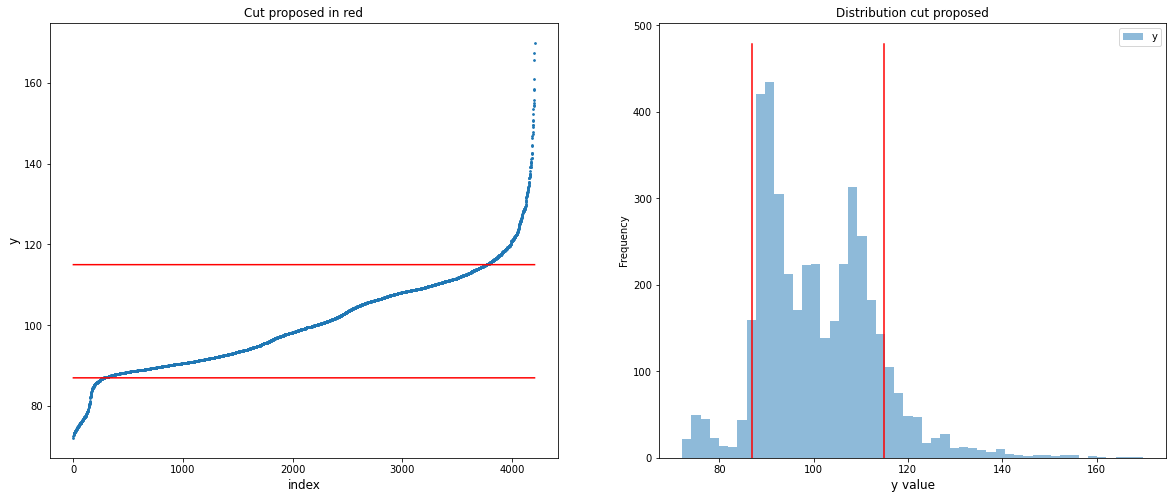

In [37]:
fig, axes = plt.subplots(1,2,figsize=(20,8))

# Figure 1
axes[0].scatter(range(X_train_clean.shape[0]),y_train.sort_values(by = ['y']).values, s = 3)
axes[0].set_xlabel('index', fontsize=12)
axes[0].set_ylabel('y', fontsize=12)
axes[0].set_title('Cut proposed in red')

ymax = 115*np.ones(X_train_clean.shape[0])
ymin = 87*np.ones(X_train_clean.shape[0])

axes[0].plot(range(X_train_clean.shape[0]), ymax, color = 'r')
axes[0].plot(range(X_train_clean.shape[0]), ymin, color = 'r')

# Figure 2
y_train.plot.hist(bins=50, alpha=0.5, ax = axes[1])
axes[1].set_xlabel('y value', fontsize=12)
axes[1].set_title('Distribution cut proposed')
axes[1].plot( 87*np.ones(480), np.arange(480), color = 'r')
axes[1].plot( 115*np.ones(480), np.arange(480), color = 'r')

In [38]:
y_lower = 87
y_upper = 115
y_train_trunc = y_train[ (y_train['y']>y_lower) & (y_train['y']<y_upper) ]
X_train_clean_trunc = X_train_clean[X_train_clean.index.isin(y_train_trunc.index)]
print('y_train_trunc:', y_train_trunc.shape, ' and ', 'X_train_trunc:', X_train_clean_trunc.shape)
print( 'We kept {0:.2%} of data'.format(y_train_trunc.shape[0]/y_train.shape[0]) )

y_train_trunc: (3494, 1)  and  X_train_trunc: (3494, 364)
We kept 83.03% of data


In [39]:
model_PCA = PCA(n_components = 0.98, svd_solver="full")
model_PCA.fit(X_train_clean_trunc)
X_train_clean_trunc_pca = model_PCA.transform(X_train_clean_trunc)
print(X_train_clean_trunc.shape, '\n', X_train_clean_trunc_pca.shape, sep = '')

# Doesn't make sense to use test data
# X_test_clean_pca = model_PCA.transform(X_test_clean)
# print(X_test_clean.shape, '\n', X_test_clean_pca.shape, sep = '')

(3494, 364)
(3494, 13)


In [40]:
X_train3, X_valid3, y_train3, y_valid3 = train_test_split(X_train_clean_trunc_pca,y_train_trunc, test_size = 0.2, random_state = 43)

In [41]:
f_train = xgb.DMatrix(X_train3, label = y_train3)
f_valid = xgb.DMatrix(X_valid3, label = y_valid3)

# Setting the parameters for XGB
params = {}
params['objective'] = 'reg:squarederror'
params['eta'] = 0.01  ## 0.02
params['max_depth'] = 8 ## 4

def scorer(m, w):
    labels = w.get_label()
    return 'r2', r2_score(labels, m)

final_set = [(f_train, 'train'), (f_valid, 'valid')]

xgb_model2 = xgb.train(params, f_train, 3000, final_set, early_stopping_rounds=50, feval=scorer, maximize=True, verbose_eval=10)


[0]	train-rmse:98.19138	train-r2:-136.25928	valid-rmse:98.08164	valid-r2:-132.92191
[10]	train-rmse:88.86871	train-r2:-111.43272	valid-rmse:88.78545	valid-r2:-108.73870
[20]	train-rmse:80.43976	train-r2:-91.11630	valid-rmse:80.36235	valid-r2:-88.90450
[30]	train-rmse:72.82010	train-r2:-74.49140	valid-rmse:72.75352	valid-r2:-72.68588
[40]	train-rmse:65.93259	train-r2:-60.88640	valid-rmse:65.88115	valid-r2:-59.42247
[50]	train-rmse:59.70746	train-r2:-49.75188	valid-rmse:59.67506	valid-r2:-48.57491
[60]	train-rmse:54.08140	train-r2:-40.63810	valid-rmse:54.06480	valid-r2:-39.69167
[70]	train-rmse:48.99760	train-r2:-33.17784	valid-rmse:48.99501	valid-r2:-32.41795
[80]	train-rmse:44.40396	train-r2:-27.06974	valid-rmse:44.41477	valid-r2:-26.46193
[90]	train-rmse:40.25407	train-r2:-22.06825	valid-rmse:40.28067	valid-r2:-21.58758
[100]	train-rmse:36.50639	train-r2:-17.97285	valid-rmse:36.54928	valid-r2:-17.59661
[110]	train-rmse:33.12319	train-r2:-14.61922	valid-rmse:33.18303	valid-r2:-14.32881

R2 is almost the same because the new PCA leads to just 1 variable less to explain data with the same threshold (98%, 14 variables previously against 13 variables now). It means both models are similar and they actually are fitting better the data without the tails explaining why the RMSE is better:

In [42]:
print( 'mean of y_valid is: {0:.2f} thus RMSE is {1:.2%} away from the mean which is a good improvement (previously it was {2:.2%}).'.format( np.mean(y_valid3['y']),  5.92853/np.mean(y_valid3['y']), 8.69412/np.mean(y_valid2['y']) )  
     )

mean of y_valid is: 99.20 thus RMSE is 5.98% away from the mean which is a good improvement (previously it was 8.64%).
